# **Notebook Pelatihan Model Proyek Sentimen Analisis**

- **Nama:** Fatikha Hudi Aryani
- **Email:** fatikhahudiaryani621@gmail.com
- **ID Dicoding:** fatikha_hudi_aryani

# **Import Library**

In [1]:
!pip install Sastrawi
!pip install nltk

In [2]:
# Import library untuk manipulasi data dan visualisasi
import pandas as pd  # Library untuk manipulasi data
import numpy as np  # Library untuk komputasi numerik
import matplotlib.pyplot as plt  # Library untuk membuat grafik
import seaborn as sns  # Library untuk visualisasi data yang lebih estetik

# Library untuk manipulasi tanggal dan waktu
import datetime as dt

# Library untuk manipulasi teks
import string  # Library untuk manipulasi karakter string
import re  # Library untuk pencocokan pola teks menggunakan regular expressions
import nltk

# Import library dari NLTK untuk pemrosesan bahasa alami
from nltk.tokenize import word_tokenize  # Untuk tokenisasi teks menjadi kata
from nltk.corpus import stopwords  # Untuk mendapatkan daftar kata-kata umum yang diabaikan (stopwords)
from nltk.stem import WordNetLemmatizer  # Untuk lemmatisasi (mengembalikan kata ke bentuk dasarnya)
from nltk import download as nltk_download  # Untuk mengunduh dataset NLTK

# Mengunduh data yang diperlukan untuk NLTK
nltk_download('punkt')  # Tokenizer bahasa Inggris
nltk_download('stopwords')  # Stopwords untuk bahasa Inggris
nltk_download('wordnet')  # Dataset untuk lemmatisasi
nltk_download('punktb_tab')  # Dataset for Punkt sentence tokenizer

# Import library dari Sastrawi untuk pemrosesan teks dalam bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Untuk stemming kata-kata dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Untuk menghapus stopwords bahasa Indonesia

# Library untuk membuat word cloud
from wordcloud import WordCloud  # Membuat representasi visual frekuensi kata

# Import library dari scikit-learn untuk machine learning
from sklearn.feature_extraction.text import TfidfVectorizer  # Untuk representasi teks dalam bentuk numerik menggunakan TF-IDF
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk membagi dataset dan melakukan pencarian parameter terbaik
from sklearn.naive_bayes import BernoulliNB  # Algoritma Naive Bayes dengan distribusi Bernoulli
from sklearn.metrics import accuracy_score, precision_score  # Metode untuk evaluasi performa model
from sklearn.preprocessing import LabelEncoder  # Untuk mengubah label kategori menjadi numerik

# Import library dari TensorFlow untuk deep learning
from tensorflow.keras.preprocessing.text import Tokenizer  # Untuk tokenisasi teks
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Untuk padding sequence agar memiliki panjang yang sama
from tensorflow.keras.models import Sequential  # Model sekuensial untuk deep learning
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D,
    Bidirectional, MaxPooling1D, Flatten, GRU, SimpleRNN
)  # Berbagai jenis layer untuk model deep learning
from tensorflow.keras.utils import to_categorical  # Untuk konversi label numerik menjadi one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping, Callback  # Callback untuk menghentikan pelatihan dini
from tensorflow.keras.regularizers import l2  # Regularisasi L2
from tensorflow.keras.optimizers import Adam  # Optimizer Adam

# Library untuk melakukan HTTP requests
import requests  # Untuk melakukan permintaan HTTP ke server

# Library untuk bekerja dengan file CSV
import csv  # Untuk membaca/menulis file CSV
from io import StringIO  # Untuk manipulasi string sebagai file

# Import TensorFlow untuk kebutuhan umum
import tensorflow as tf


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading punktb_tab: Package 'punktb_tab' not found
[nltk_data]     in index


In [3]:
%pip freeze > requirements.txt

# **Load Dataset**

In [4]:
# Read dataset dan menyimpannya ke dalam variabel df
df = pd.read_csv('brimo_reviews_10K.csv')

In [5]:
# Menampilkan 10 data teratas.
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,847840c6-7803-44b8-9049-ea327eb26983,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,NaN,2025-04-13 14:55:55,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-04-13 17:13:01,NaN
1,e483f2d4-e5d0-4c6a-a2a3-c7cd9f2a8137,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,2.81.0,2025-04-13 14:51:04,"Hai Sobat BRI Subur Makmur, terima kasih atas ...",2025-04-13 15:27:46,2.81.0
2,c713c1fe-fb2f-497b-bc01-cad79a6cc608,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,2.80.0,2025-04-13 14:44:52,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-04-13 14:54:52,2.80.0
3,f1eb1dfb-5c87-40b9-a12c-ecc31a161f0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terbaik,4,0,2.81.0,2025-04-13 14:37:08,"Hai, Sobat BRI. Terima kasih atas ulasannya. S...",2025-04-13 14:50:23,2.81.0
4,03a78171-6b60-4af0-b727-c58413e4c4fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kendala untuk ubah nomer ponsel .harus dtng ke...,1,0,2.75.0,2025-04-13 14:30:41,"Hai Sobat BRI, mohon maaf atas kendala yang di...",2025-04-13 15:02:08,2.75.0
5,807bf9f3-0a89-45e5-95ca-e5d0afa8f8fa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangatt mudah dlm transaksi apapun,5,0,2.81.0,2025-04-13 14:26:38,"Hai Sobat BRI, terima kasih sudah menggunakan ...",2025-04-13 15:00:36,2.81.0
6,9783f751-0372-4b76-845d-dc5b751f8bc2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kemudahan dalam bertransaksi,5,0,2.81.0,2025-04-13 14:25:56,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-04-13 14:51:04,2.81.0
7,51bb08e6-363b-402b-be55-fc9162ae730c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu,5,0,2.81.0,2025-04-13 14:25:39,Terima kasih atas ulasannya. Semoga aplikasi B...,2025-04-13 14:50:37,2.81.0
8,344fa86f-c505-43df-88e8-0c598ae77bc1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,2.57.0,2025-04-13 14:21:21,"Hai Sobat BRI, terima kasih sudah menggunakan ...",2025-04-13 15:00:40,2.57.0
9,6b3bf70f-57dd-4812-b2c3-5650e08cb5b2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kren,5,0,2.80.0,2025-04-13 14:12:35,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-04-13 14:30:59,2.80.0


In [6]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8316 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          9515 non-null   object
 9   repliedAt             9515 non-null   object
 10  appVersion            8316 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


Berdasarkan hasil diatas, dalam proyek analisis sentimen ini hanya akan menggunakan kolom userName, content, score, dan at untuk digunakan dalam membangun pelatihan model.

In [7]:
# Menghitung dan menampilkan nilai NaN
missing_df = df.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_df)

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1684
at                         0
replyContent             485
repliedAt                485
appVersion              1684
dtype: int64


# **Persiapan Data (Data Preparation)**

In [8]:
# Hapus kolom pada DataFrame yang tidak berguna untuk pemodelan
df = df.drop(columns=['reviewId', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'])
print(df.columns)

Index(['userName', 'content', 'score', 'at'], dtype='object')


In [9]:
# Menampilkan kembali informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
 3   at        10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [10]:
# Menghapus missing value dan menghapus duplicate data pada kolom 'content'
brimo_clean_df = df.dropna(subset=['content'])
brimo_clean_df = brimo_clean_df.drop_duplicates()

In [11]:
# Menampilkan info dataset setelah dilakukan cleaning data
brimo_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
 3   at        10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [12]:
# Hitung jumlah score dari tiap rating
df['score'].value_counts()

,count
score,
5,7487
1,1127
4,668
3,389
2,329


# **Pelabelan Data**

**Percobaan labelled data dengan membuat daftar sentimen berdasarkan score atau rating ulasan user**

In [13]:
# Inisialisasi daftar sentimen
label_sentiment = []

# Iterasi setiap baris dalam DataFrame
for index, row in df.iterrows():
    if row['score'] > 3 :
        label_sentiment.append('positive')     # label positif untuk score 4 - 5
    elif row['score'] == 3:
        label_sentiment.append('neutral')     # label netral untuk score 3
    else:
        label_sentiment.append('negative')    # label negatif untuk score 1 - 2

# Tambahkan kolom baru
df['label_sentiment'] = label_sentiment
df

,userName,content,score,at,label_sentiment
0,Pengguna Google,bagus,5,2025-04-13 14:55:55,positive
1,Pengguna Google,good,5,2025-04-13 14:51:04,positive
2,Pengguna Google,keren,5,2025-04-13 14:44:52,positive
3,Pengguna Google,terbaik,4,2025-04-13 14:37:08,positive
4,Pengguna Google,kendala untuk ubah nomer ponsel .harus dtng ke...,1,2025-04-13 14:30:41,negative
...,...,...,...,...,...
9995,Martinus Onsi,ku beri bintang 5 karena aplikasinya sangat me...,5,2025-03-18 13:03:07,positive
9996,Inriyani Saragih,Ok,5,2025-03-18 13:02:37,positive
9997,yanto Suyanto,Ok banget,5,2025-03-18 13:01:09,positive
9998,Nuraini Riskulah Harmain,kok saya nggak semudah itu buat buka rekening ...,5,2025-03-18 13:00:57,positive


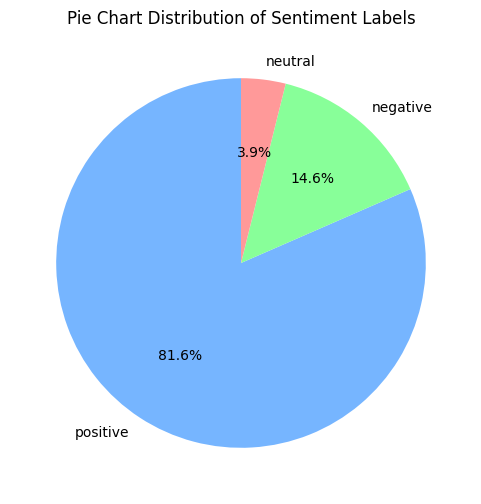

In [14]:
# Menghitung jumlah label pada setiap kategori pelabelan
label_counts = df['label_sentiment'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#76b5ff', '#88ff99', '#ff9999'])
plt.title('Pie Chart Distribution of Sentiment Labels')
plt.show()

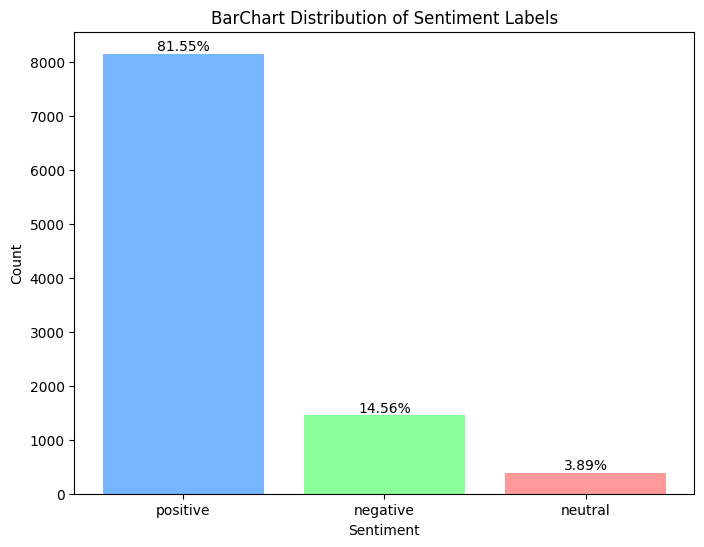

In [15]:
# Mengitung jumlah label pada setiap kategori pelabelan
label_counts = df['label_sentiment'].value_counts()

# Menghitung persentase untuk setiap kategori pelabelan
label_percentages = label_counts / label_counts.sum() * 100

# Buat bar chart dan simpan dalam variabel `barchart`
plt.figure(figsize=(8, 6))
barchart = plt.bar(label_counts.index, label_counts.values, color=['#76b5ff', '#88ff99', '#ff9999'])

# Tambahkan persentase di atas setiap bar
for bar, percentage in zip(barchart, label_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('BarChart Distribution of Sentiment Labels')
plt.show()

**Percobaan labelled data berdasarkan kamus kata-kata (dalam hal ini file kamus kata diambil dari github)**

In [16]:
# Mendefinisikan fungsi-fungsi untuk tahap preprocessing text

# fungsi untuk mengubah text menjadi lowercase.
def caseFoldingText(text):
    text = text.lower()
    return text

# fungsi untuk menghapus mentions, hastag, RT, link, dan numbers dari text.
def cleaningText(text):
    text = re.sub(r'[^\w\s]', '', text) # hapus numbers
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # hapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # hapus hashtag
    text = text.strip(' ') # hapus characters space from both left and right text
    text = text.replace('\n', ' ') # replace new line into space
    text = re.sub(r"http\S+", '', text) # hapus link
    text = re.sub(r'RT[\s]', '', text) # hapus retweet (RT)
    text = re.sub(r'[0-9]+', '', text) # hapus numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # hapus semua punctuations
    return text

# fungsi untuk memecah text menjadi list tokens.
def tokenizeText(text):
    text = word_tokenize(text)
    return text

# fungsi untuk menghapus stopwords dalam bahasa Indonesia ataupun Inggris.
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['gak','hah','iya','yaa','nya','na','sih','ku',"di",'oh','ga','ya','yes','gaa','hah','loh','lah','wei','kah','woi','woii','woy'])
    filter = []
    for txt in text:
        if txt not in listStopwords:
            filter.append(txt)
    text = filter
    return text

# fungsi untuk menggabungkan kembali text yang sebelumnya dipecah menjadi token.
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

Inisialisasi fungsi yang digunakan untuk mengubah slangwords menjadi bentuk baku.

In [17]:
# Mendefinisikan fungsi untuk mengubah slangwords menjadi bentuk baku

# Membaca kamus slang dari file Excel
slang_words = pd.read_excel('kamuskatabaku.xlsx')

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slang_words:
            fixed_words.append(slang_words[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [18]:
# Inisialisasi clean_df sebagai dataframe yang sudah dilakukan cleaning
brimo_clean_df.head(10)

,userName,content,score,at
0,Pengguna Google,bagus,5,2025-04-13 14:55:55
1,Pengguna Google,good,5,2025-04-13 14:51:04
2,Pengguna Google,keren,5,2025-04-13 14:44:52
3,Pengguna Google,terbaik,4,2025-04-13 14:37:08
4,Pengguna Google,kendala untuk ubah nomer ponsel .harus dtng ke...,1,2025-04-13 14:30:41
5,Pengguna Google,sangatt mudah dlm transaksi apapun,5,2025-04-13 14:26:38
6,Pengguna Google,kemudahan dalam bertransaksi,5,2025-04-13 14:25:56
7,Pengguna Google,sangat membantu,5,2025-04-13 14:25:39
8,Pengguna Google,ok,5,2025-04-13 14:21:21
9,Pengguna Google,kren,5,2025-04-13 14:12:35


Menerapkan preprocessing text pada dataset

In [19]:
!pip install nltk # Menginstall nltk
import nltk
nltk.download('punkt_tab') # Download punkt_tab

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
brimo_clean_df['text_clean'] = brimo_clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
brimo_clean_df['text_caseFoldingText'] = brimo_clean_df['text_clean'].apply(caseFoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
brimo_clean_df['text_slangwords'] = brimo_clean_df['text_caseFoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
brimo_clean_df['text_tokenizingText'] = brimo_clean_df['text_slangwords'].apply(tokenizeText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
brimo_clean_df['text_stopword'] = brimo_clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_sentence'
brimo_clean_df['text_sentence'] = brimo_clean_df['text_stopword'].apply(toSentence)

In [21]:
# Menampilkan dataset setelah dilakukan preprocessing text
brimo_clean_df.head()

,userName,content,score,at,text_clean,text_caseFoldingText,text_slangwords,text_tokenizingText,text_stopword,text_sentence
0,Pengguna Google,bagus,5,2025-04-13 14:55:55,bagus,bagus,bagus,[bagus],[bagus],bagus
1,Pengguna Google,good,5,2025-04-13 14:51:04,good,good,good,[good],[good],good
2,Pengguna Google,keren,5,2025-04-13 14:44:52,keren,keren,keren,[keren],[keren],keren
3,Pengguna Google,terbaik,4,2025-04-13 14:37:08,terbaik,terbaik,terbaik,[terbaik],[terbaik],terbaik
4,Pengguna Google,kendala untuk ubah nomer ponsel .harus dtng ke...,1,2025-04-13 14:30:41,kendala untuk ubah nomer ponsel harus dtng ke ...,kendala untuk ubah nomer ponsel harus dtng ke ...,kendala untuk ubah nomer ponsel harus dtng ke ...,"[kendala, untuk, ubah, nomer, ponsel, harus, d...","[kendala, ubah, nomer, ponsel, dtng, kantor, b...",kendala ubah nomer ponsel dtng kantor brisial ...


In [22]:
# Memuat positive lexicon data dari GitHub dan membaca data kamus kata-kata positif dari GitHub
positive_lexicon = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    positive_lexicon[row[0]] = int(row[1])


# Memuat negative lexicon data dari GitHub dan membaca data kamus kata-kata negatif dari GitHub
negative_lexicon = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    negative_lexicon[row[0]] = int(row[1])

In [23]:
# Fungsi untuk menentukan polaritas sentimen

def lexicon_sentiment_analysis(text):
    score = 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in positive_lexicon):
            score = score + positive_lexicon[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in negative_lexicon):
            score = score + negative_lexicon[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    # Inisialisasi variabel polaritas
    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

# **Labelled Data Berdasarkan perhitungan polaritas**

In [24]:
# Memberi label pada text untuk menghitung polaritas
results = brimo_clean_df['text_stopword'].apply(lexicon_sentiment_analysis)
results = list(zip(*results))
brimo_clean_df['score_polarity'] = results[0]
brimo_clean_df['polarity'] = results[1]
print(brimo_clean_df['polarity'].value_counts())

polarity
positive    4693
negative    2677
neutral     2630
Name: count, dtype: int64


# **Data Understanding**

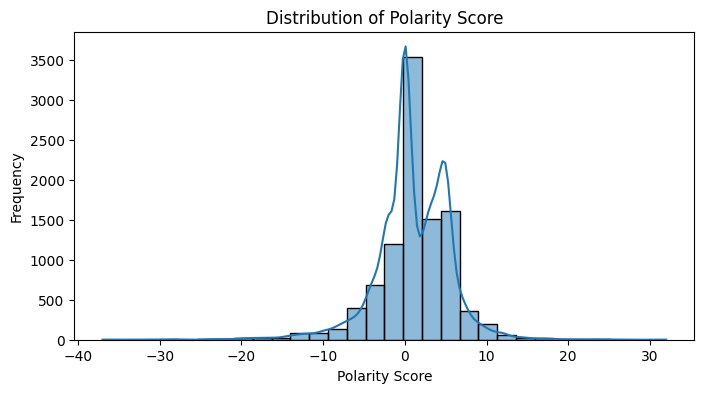

In [25]:
# Menampilkan distribusi score_polarity dengan histogram guna mempermudah visualisasi pembagian dataset
plt.figure(figsize=(8, 4))
sns.histplot(brimo_clean_df['score_polarity'], bins=30, kde=True)
plt.title('Distribution of Polarity Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

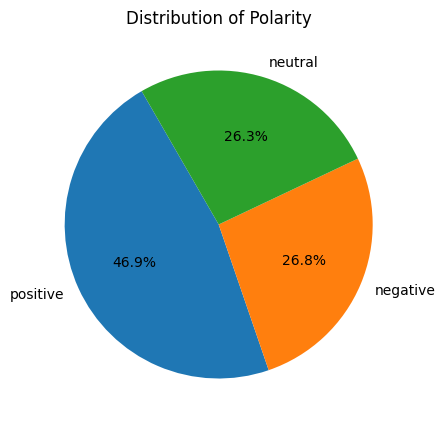

In [26]:
# Hitung jumlah masing-masing kategori polaritas
counts_polarity = brimo_clean_df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(5, 5))
plt.pie(counts_polarity, labels=counts_polarity.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Polarity')
plt.show()

# **Word Cloud**

*   Word Cloud secara Umum


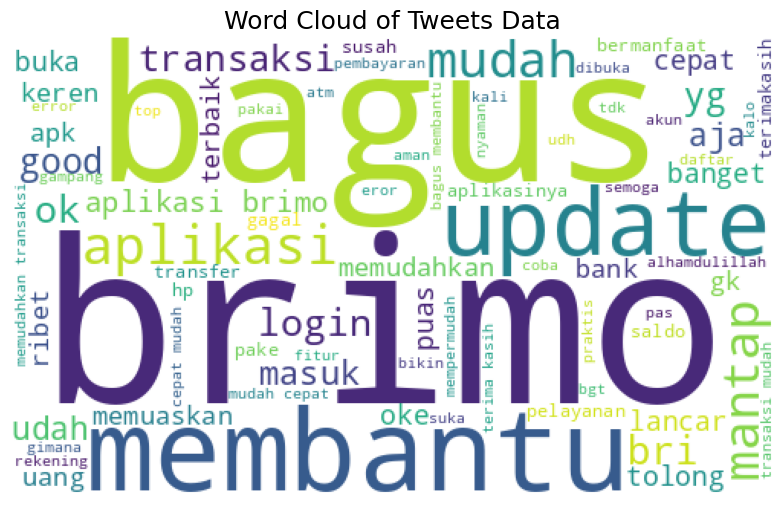

In [27]:
# Membuat wordcloud secara umum dari dataset tanpa melihat label

list_words = ''

for tweet in brimo_clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=500, height=300, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

*   Word Cloud untuk Label Positif

In [28]:
# Membuat dataframe untuk wordcloud positive
pd.set_option('display.max_colwidth', 3000)

tweets_positive = brimo_clean_df[brimo_clean_df['polarity'] == 'positive']
tweets_positive = tweets_positive[['text_sentence', 'score_polarity', 'polarity','text_stopword']]
tweets_positive = tweets_positive.sort_values(by='score_polarity', ascending=False)
tweets_positive = tweets_positive.reset_index(drop=True)
tweets_positive.index += 1

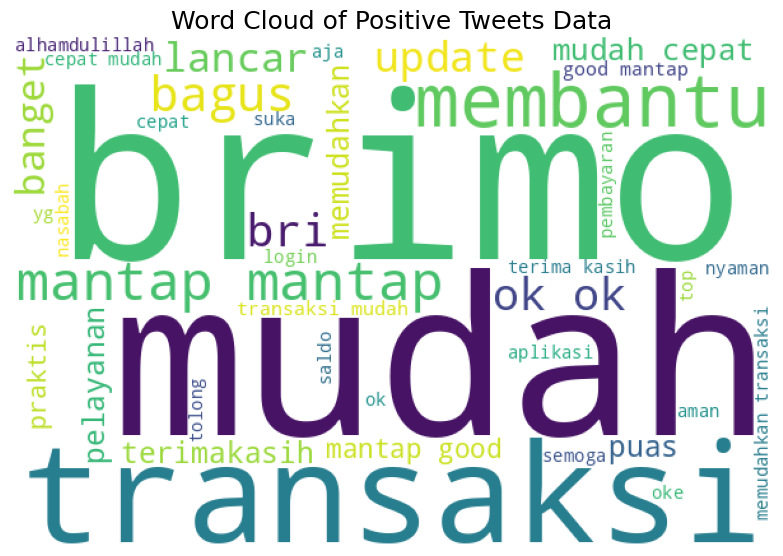

In [29]:
# Menampilkan wordcloud untuk label positive
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'tweets_positive'.
for tweet in tweets_positive['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

*   Word Cloud untuk label Negatif

In [30]:
# Membuat dataframe untuk wordcloud negative
pd.set_option('display.max_colwidth', 3000)

tweets_negative = brimo_clean_df[brimo_clean_df['polarity'] == 'negative']
tweets_negative = tweets_negative[['text_sentence', 'score_polarity', 'polarity','text_stopword']]
tweets_negative = tweets_negative.sort_values(by='score_polarity', ascending=False)
tweets_negative = tweets_negative.reset_index(drop=True)
tweets_negative.index += 1

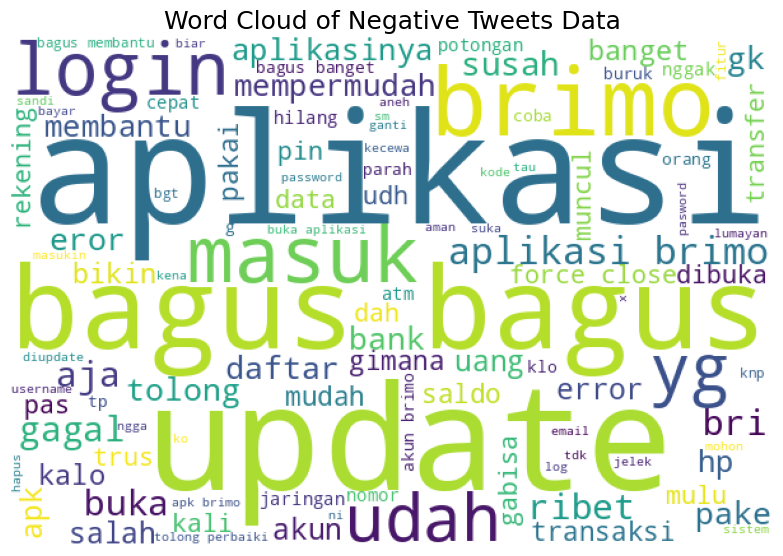

In [31]:
# Menampilkan wordcloud untuk label negative
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'tweets_negative'.
for tweet in tweets_negative['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

*   Word Cloud untuk Label Netral

In [32]:
# Membuat dataframe untuk wordcloud neutral
pd.set_option('display.max_colwidth', 3000)

tweets_neutral = brimo_clean_df[brimo_clean_df['polarity'] == 'neutral']
tweets_neutral = tweets_neutral[['text_sentence', 'score_polarity', 'polarity','text_stopword']]
tweets_neutral = tweets_neutral.sort_values(by='score_polarity', ascending=False)
tweets_neutral = tweets_neutral.reset_index(drop=True)
tweets_neutral.index += 1

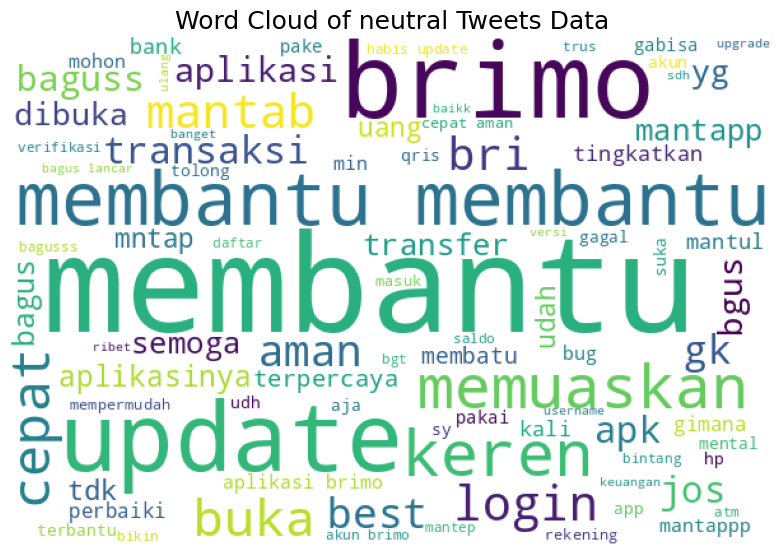

In [33]:
# Menampilkan wordcloud untuk label neutral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'tweets_neutral'.
for tweet in tweets_neutral['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

# **Visualisasi Data**

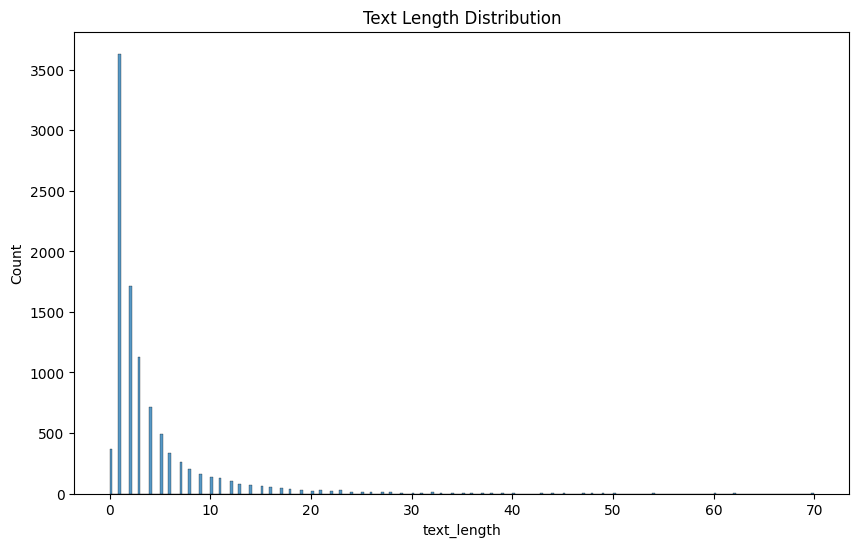

In [34]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Visualisasi text untuk length distribution
brimo_clean_df['text_length'] = brimo_clean_df['text_sentence'].apply(lambda x: len(x.split()))
sns.histplot(brimo_clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

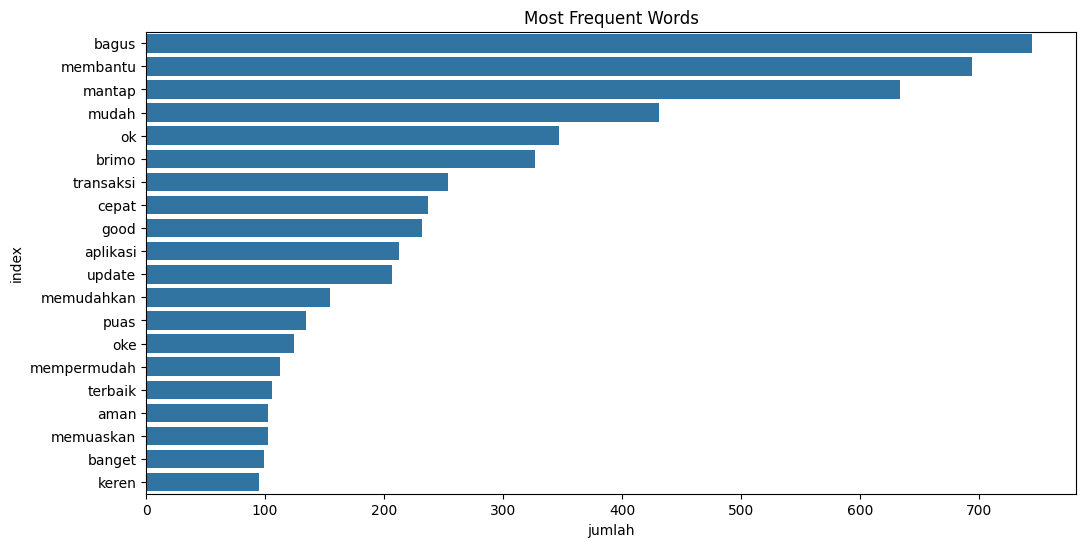

In [35]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(brimo_clean_df['text_sentence'])

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf = df_tfidf.sum().reset_index(name='jumlah')
df_tfidf = df_tfidf.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=df_tfidf)
plt.title('Most Frequent Words')
plt.show()

# **Pemodelan**

Tahap Pemodelan ini dilakukan dengan menggunakan tiga percobaan dengan algoritma pelatihan yang berbeda. Selain itu, dibedakan dengan variasi dari dua kombinasi yaitu algoritma pelatihan serta pembagian data dari tiap model seperti berikut:

- Model 1
  - Algoritma Pelatihan: Long Short Term Memory (LSTM)
  - Pembagian Data: Training 70%, validation 20%, testing 10%
- Model 2
  - Algoritma Pelatihan: Convolutional Neural Network (CNN)
  - Pembagian Data: Training 80%, validation 10%, testing 10%
- Model 3
  - Algoritma Pelatihan: Gated Recurrent Units (GRU)
  - Pembagian Data: Training 90%, validation 5%, testing 5%

In [36]:
# Mengambil kolom text_sentence (yang dijadikan fitur) dan polarity (dijadikan target)
X = brimo_clean_df['text_sentence']
y = brimo_clean_df['polarity']

In [37]:
# Tokenisasi
max_features = 3000
tokenisasi = Tokenizer(num_words=max_features, split=' ')
tokenisasi.fit_on_texts(X.values)
X = tokenisasi.texts_to_sequences(X.values)
X = pad_sequences(X)

# Label encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

In [41]:
# Mendefinisikan custom callbacks yang akan berhenti apabila nilai akurasi training > 0.92
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.92:
            print(f"\nVal accuracy telah melebihi 0.92, menghentikan pelatihan pada epoch {epoch+1}")
            self.model.stop_training = True
early_stopping = CustomCallback()

**Model 1 - Long Short Term Memory (LSTM)**

**Membagi data menjadi 3 subset yaitu train (70%), validation (20%), dan test (10%). Pembagian data dilakukan dengan stratifikasi menggunakan random_state=42**

In [42]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [43]:
# Membangun model LSTM
LSTM_model = Sequential()
LSTM_model.add(Embedding(max_features, 256, input_length=X.shape[1]))
LSTM_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
LSTM_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
LSTM_model.add(Dense(128, activation='relu'))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dense(num_classes, activation='softmax'))
LSTM_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 1028
history_LSTM = LSTM_model.fit(X_train_LSTM, y_train_LSTM, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_LSTM, y_val_LSTM))

Epoch 1/50
7/7 - 48s - 7s/step - accuracy: 0.4143 - loss: 5.7661 - val_accuracy: 0.4730 - val_loss: 5.1634
Epoch 2/50
7/7 - 25s - 4s/step - accuracy: 0.4676 - loss: 4.7926 - val_accuracy: 0.4730 - val_loss: 4.2933
Epoch 3/50
7/7 - 41s - 6s/step - accuracy: 0.4710 - loss: 3.9866 - val_accuracy: 0.5040 - val_loss: 3.5706
Epoch 4/50
7/7 - 40s - 6s/step - accuracy: 0.5094 - loss: 3.3225 - val_accuracy: 0.5225 - val_loss: 2.9737
Epoch 5/50
7/7 - 41s - 6s/step - accuracy: 0.5194 - loss: 2.7756 - val_accuracy: 0.5370 - val_loss: 2.4805
Epoch 6/50
7/7 - 41s - 6s/step - accuracy: 0.5377 - loss: 2.3239 - val_accuracy: 0.5770 - val_loss: 2.0920
Epoch 7/50
7/7 - 25s - 4s/step - accuracy: 0.5901 - loss: 1.9355 - val_accuracy: 0.6440 - val_loss: 1.7037
Epoch 8/50
7/7 - 41s - 6s/step - accuracy: 0.6729 - loss: 1.5549 - val_accuracy: 0.8310 - val_loss: 1.3724
Epoch 9/50
7/7 - 40s - 6s/step - accuracy: 0.8204 - loss: 1.2216 - val_accuracy: 0.8555 - val_loss: 1.0727
Epoch 10/50
7/7 - 40s - 6s/step - acc

**Hasil evaluasi akan menampilkan test score dan test accuracy**
- Test Score : nilai loss pada data test
- Test Accuracy : akurasi model pada data test
- Semakin rendah nilai test score dan semakin tinggi accuracy, maka semakin baik performa model

In [46]:
# Evaluasi model
score_LSTM, accuracy_LSTM = LSTM_model.evaluate(X_test_LSTM, y_test_LSTM, verbose=2, batch_size=1028)  # verbose=2   : Menampilkan output minimal (hanya hasil akhir)
print("Test score: %.2f" % (score_LSTM))
print("Test accuracy: %.2f" % (accuracy_LSTM))

1/1 - 2s - 2s/step - accuracy: 0.9240 - loss: 0.3842
Test score: 0.38
Test accuracy: 0.92


Hasil dari evaluasi model Long Short Term Memory (LSTM) menunjukkan bahwa pengujian menghasilkan nilai test score sebesar 0.38 dan nilai akurasi yang tinggi yaitu sebesar 0.92. Ini berarti model memiliki akurasi 92% pada data test dengan loss 0.38 dan menunjukkan performa model Long Short Term Memory (LSTM) bagus.

In [47]:
LSTM_model.save('LSTM_model.h5')

**Model 2 - CNN (Convlutional Neural Network)**

**Membagi data menjadi 3 subset yaitu train (80%), validation (10%), dan test (10%). Pembagian data dilakukan dengan stratifikasi menggunakan random_state=42**

In [52]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_CNN, y_train_val, y_test_CNN = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

In [53]:
# Membangun model CNN
CNN_model = Sequential()
CNN_model.add(Embedding(max_features, 512, input_length=X.shape[1]))
CNN_model.add(Conv1D(64, kernel_size=5, activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(num_classes, activation='softmax'))
CNN_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 1028
history_CNN = CNN_model.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_CNN, y_val_CNN))

Epoch 1/50
8/8 - 19s - 2s/step - accuracy: 0.4457 - loss: 1.0689 - val_accuracy: 0.4810 - val_loss: 1.0290
Epoch 2/50
8/8 - 22s - 3s/step - accuracy: 0.5014 - loss: 1.0105 - val_accuracy: 0.5260 - val_loss: 0.9354
Epoch 3/50
8/8 - 19s - 2s/step - accuracy: 0.5701 - loss: 0.8944 - val_accuracy: 0.6170 - val_loss: 0.7659
Epoch 4/50
8/8 - 21s - 3s/step - accuracy: 0.7165 - loss: 0.6898 - val_accuracy: 0.8440 - val_loss: 0.5683
Epoch 5/50
8/8 - 19s - 2s/step - accuracy: 0.8344 - loss: 0.5012 - val_accuracy: 0.8720 - val_loss: 0.3974
Epoch 6/50
8/8 - 21s - 3s/step - accuracy: 0.8871 - loss: 0.3628 - val_accuracy: 0.8990 - val_loss: 0.3154
Epoch 7/50
8/8 - 20s - 2s/step - accuracy: 0.9239 - loss: 0.2726 - val_accuracy: 0.9090 - val_loss: 0.2803
Epoch 8/50
8/8 - 20s - 3s/step - accuracy: 0.9438 - loss: 0.2094 - val_accuracy: 0.9140 - val_loss: 0.2600
Epoch 9/50
8/8 - 21s - 3s/step - accuracy: 0.9594 - loss: 0.1593 - val_accuracy: 0.9190 - val_loss: 0.2468
Epoch 10/50
8/8 - 20s - 3s/step - acc

**Hasil evaluasi akan menampilkan test score dan test accuracy**
- Test Score : nilai loss pada data test
- Test Accuracy : akurasi model pada data test
- Semakin rendah nilai test score dan semakin tinggi accuracy, maka semakin baik performa model

In [54]:
# Evaluasi model
score_CNN, accuracy_CNN = CNN_model.evaluate(X_test_CNN, y_test_CNN, verbose=2, batch_size=1028) # verbose=2   : Menampilkan output minimal (hanya hasil akhir)
print("Test score: %.2f" % (score_CNN))
print("Test accuracy: %.2f" % (accuracy_CNN))

1/1 - 0s - 495ms/step - accuracy: 0.9200 - loss: 0.2840
Test score: 0.28
Test accuracy: 0.92


Hasil dari evaluasi model Convolutional Neural Network (CNN) menunjukkan bahwa pengujian menghasilkan nilai test score sebesar 0.28 dan nilai akurasi yang tinggi yaitu sebesar 0.92. Ini berarti model memiliki akurasi 92% pada data test dengan loss 0.28 dan menunjukkan performa model Convolutional Neural Network (CNN) bagus.

In [55]:
CNN_model.save('CNN_model.h5')

**Model 3 - Gated Recurrent Units (GRU)**

**Membagi data menjadi 3 subset yaitu train (90%), validation (5%), dan test (5%). Pembagian data dilakukan dengan stratifikasi menggunakan random_state=42**

In [56]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=5/95, random_state=42)

In [59]:
# Membangun model GRU
GRU_model = Sequential()
GRU_model.add(Embedding(max_features, 512, input_length=X.shape[1]))
GRU_model.add(SpatialDropout1D(0.3))
GRU_model.add(Bidirectional(GRU(64, return_sequences=True)))
GRU_model.add(Bidirectional(GRU(128, return_sequences=False)))
GRU_model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
GRU_model.add(Dropout(0.5))
GRU_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
GRU_model.add(Dropout(0.5))
GRU_model.add(Dense(num_classes, activation='softmax'))
GRU_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 1028
history_GRU = GRU_model.fit(X_train_GRU, y_train_GRU, epochs=20, batch_size=batch_size, verbose=2, validation_data=(X_val_GRU, y_val_GRU),callbacks=[early_stopping])

Epoch 1/20
9/9 - 68s - 8s/step - accuracy: 0.4452 - loss: 3.4139 - val_accuracy: 0.4840 - val_loss: 3.0918
Epoch 2/20
9/9 - 80s - 9s/step - accuracy: 0.5403 - loss: 2.8585 - val_accuracy: 0.6760 - val_loss: 2.4133
Epoch 3/20
9/9 - 82s - 9s/step - accuracy: 0.7551 - loss: 2.2218 - val_accuracy: 0.8780 - val_loss: 1.8747
Epoch 4/20
9/9 - 108s - 12s/step - accuracy: 0.8791 - loss: 1.7128 - val_accuracy: 0.9040 - val_loss: 1.5236
Epoch 5/20
9/9 - 91s - 10s/step - accuracy: 0.9230 - loss: 1.3638 - val_accuracy: 0.9140 - val_loss: 1.2381
Epoch 6/20

Val accuracy telah melebihi 0.92, menghentikan pelatihan pada epoch 6
9/9 - 114s - 13s/step - accuracy: 0.9512 - loss: 1.0894 - val_accuracy: 0.9320 - val_loss: 1.0206


**Hasil evaluasi akan menampilkan test score dan test accuracy**
- Test Score : nilai loss pada data test
- Test Accuracy : akurasi model pada data test
- Semakin rendah nilai test score dan semakin tinggi accuracy, maka semakin baik performa model

In [60]:
# Evaluasi model
score_GRU, accuracy_GRU = GRU_model.evaluate(X_test_GRU, y_test_GRU, verbose=2, batch_size=1028) # verbose=2   : Menampilkan output minimal (hanya hasil akhir)
print("Test score: %.2f" % (score_GRU))
print("Test accuracy: %.2f" % (accuracy_GRU))

1/1 - 1s - 800ms/step - accuracy: 0.9060 - loss: 1.1104
Test score: 1.11
Test accuracy: 0.91


Hasil dari evaluasi model Gated Recurrent Units (GRU) menunjukkan bahwa pengujian menghasilkan nilai test score sebesar 1.11 dan nilai akurasi yang tinggi yaitu sebesar 0.91. Ini berarti model memiliki akurasi 91% pada data test dengan loss 1.11 dan menunjukkan performa model Gated Recurrent Units (GRU) bagus.

In [61]:
# Menyimpan model
GRU_model.save('GRU_model.h5')

# **Evaluasi Model**

In [62]:
results_df = pd.DataFrame({
    'Model': ['LSTM', 'CNN', 'GRU'],
    'Accuracy Train': [history_LSTM.history['accuracy'][-1], history_CNN.history['accuracy'][-1],history_GRU.history['accuracy'][-1]],
    'Accuracy Test': [accuracy_LSTM, accuracy_CNN,accuracy_GRU]
})
results_df

,Model,Accuracy Train,Accuracy Test
0,LSTM,0.976143,0.924
1,CNN,0.973625,0.920
2,GRU,0.951222,0.906


* Akurasi Training : nilai akurasi yang diambil dari epoch terakhir proses pelatihan
* Akurasi Testing : nilai akurasi hasil evaluasi pada data test

* Dari hasil evaluasi model diatas menunjukkan bahwa perbandingan performa ketiga model (LSTM, CNN, dan GRU) dengan menampilkan akurasi training dan akurasi testing yang besarnya sama-sama tinggi yaitu lebih dari 0.9. Namun model yang menunjukkan performa paling baik diantara ketiganya yaitu model LSTM dan CNN dengan nilai Accuracy Train sebesar 0.97 dan Accuracy Test sebesar 0.92.
* Hasil dataframe **result_df** digunakan untuk menganalisis dan membandingkan kinerja ketiga model secara sekaligus, baik dalam hal pembelajaran (training) maupun kemampuan generalisasi (testing).

# **Prediksi**

*   Prediksi dilakukan dengan menggunakan 3 model berbeda yaitu LSTM, CNN, GRU.
*   Untuk input data, terdapat 3 teks baru yang akan diprediksi sentimennya (positive, negative, neutral).
*   Preprocessing dengan mengubah teks baru menjadi sequence menggunakan tokenizer yang sama seperti saat pelatihan. Dan Sequence dipadding agar memiliki panjang yang sama dengan data training (X.shape[1]).


In [72]:
# Contoh data baru berupa teks
new_texts = [
    # Negative
    "Aplikasi BRImo sangat lambat dan sering error ketika melakukan transaksi, terutama di jam sibuk. Proses transfer sering gagal padahal jaringan internet saya stabil.",
    # Positive
    "BRImo sangat memudahkan transaksi sehari-hari dengan antarmuka yang intuitif. Fitur QRIS-nya cepat dan notifikasi transaksi sangat real-time.",
    # Negative
    "Verifikasi OTP sering tidak sampai atau terlambat hingga 10 menit, membuat login jadi frustasi. Update terbaru malah bikin aplikasi lebih sering crash."
]

# Nilai asli dari teks
true_labels = ["positive", "negative", "neutral"]

# Tokenisasi teks baru
sequences_new = tokenisasi.texts_to_sequences(new_texts)
padded_sequences = pad_sequences(sequences_new, maxlen=X.shape[1])

# Membuat prediksi berdasarkan 3 model
predict_LSTM_model = LSTM_model.predict(padded_sequences)
predict_CNN_model = CNN_model.predict(padded_sequences)
predict_GRU_model = GRU_model.predict(padded_sequences)

# Mengubah prediksi menjadi label
predict_labels_LSTM = np.argmax(predict_LSTM_model, axis=1)
predict_labels_CNN = np.argmax(predict_CNN_model, axis=1)
predict_labels_GRU = np.argmax(predict_GRU_model, axis=1)

predict_labels_LSTM = label_encoder.inverse_transform(predict_labels_LSTM)
predict_labels_CNN = label_encoder.inverse_transform(predict_labels_CNN)
predict_labels_GRU = label_encoder.inverse_transform(predict_labels_GRU)

# Menampilkan hasil prediksi
for text, true_label, label_LSTM, label_CNN, label_GRU in zip(new_texts, true_labels, predict_labels_LSTM, predict_labels_CNN, predict_labels_GRU):
    print(f"Text: {text}\nTrue Label: {true_label}\nPredicted Label (LSTM): {label_LSTM}\nPredicted Label (CNN): {label_CNN}\nPredicted Label (GRU): {label_GRU}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Text: Aplikasi BRImo sangat lambat dan sering error ketika melakukan transaksi, terutama di jam sibuk. Proses transfer sering gagal padahal jaringan internet saya stabil.
True Label: positive
Predicted Label (LSTM): negative
Predicted Label (CNN): negative
Predicted Label (GRU): negative

Text: BRImo sangat memudahkan transaksi sehari-hari dengan antarmuka yang intuitif. Fitur QRIS-nya cepat dan notifikasi transaksi sangat real-time.
True Label: negative
Predicted Label (LSTM): positive
Predicted Label (CNN): positive
Predicted Label (GRU): positive

Text: Verifikasi OTP sering tidak sampai atau terlambat hingga 10 menit, membuat login jadi frustasi. Update terbaru malah bikin aplikasi lebih sering crash.
True Label: neutral
Predicted Label (LSTM): negative
Predicted Label (CNN): negative
Predicted Label (GRU): negative

